This Notebook is for the calculation of  the COM trajectory and  end effector of swing leg trajectory for the one step of biped walkig using 3DLIPM

In [1]:
!pip install celluloid

In [2]:
import math

# calulating maginitude of initial position
def ini_para(sx ,sy , n):
    x0 = sx /2 
    y0 = ( (-1)**n ) * sy/2

    return x0 , y0

# calculating the initial velocities
def ini_vel( x0 ,y0 , Tc , T):
    
    C = math.cosh(T/Tc)
    S = math.sinh(T/Tc)

    xd0 =  ( -1 *x0 * ( C+1 ) ) / (S*Tc)
    yd0 =  ( y0 * ( 1 - C) ) / (S*Tc)

    return xd0 , yd0

# calculating the trajectory of the com
def traj( x0 , y0 ,xd0 , yd0 ,zc , T , Tc):
    x_data = []
    X = [ x0 ,xd0]

    y_data = []
    Y = [y0 ,yd0]

    t = 0 
    dt = 0.002
    t_data = []

    z_data = []

    while t <= T+dt :
        C = math.cosh( t/Tc)
        S = math.sinh( t/Tc)

        x = x0 * C  + Tc * xd0 * S
        y = y0 * C  + Tc * yd0 * S

        x_data.append( x  )
        y_data.append( y -y0 )
        z_data.append( zc )
        t_data.append( t )

        t += dt 

    return x_data ,y_data , z_data , t_data
  


In [3]:
# call for above functions
def full_traj( sx ,sy ,zc , T , n):
    import math
    g = 9.8
    Tc = ( zc/g)**0.5
    x0 ,y0 = ini_para( sx,sy,n) # it just return the magnitude

    x0 = -1 * x0
    y0 = -1 * y0

    

    xd0 , yd0 = ini_vel( x0 , y0 , Tc , T)

    print ( x0 , y0 ,xd0 ,yd0)

    x_data ,y_data , z_data , t_data = traj(  x0 ,  y0 ,xd0 ,yd0 , zc , T ,Tc)

    return x_data ,y_data ,z_data ,t_data

In [4]:
# swing leg trajectory 
# here I genrate the elliptical trajectory for the swing leg
def swing_leg_data( x_data , y_data ,zc ,n ):

    x_s = [ 2*i for i in x_data]

    yc = 0
    if n %2 == 0:
        yc = max( y_data)
    else :
        yc = min( y_data)

    y_s = [ -2*yc for i in range(len(y_data))]

    a = max (  abs(max(x_s)) , abs(min(x_s)) )
    b = 0.2 * zc

    z_s = [ (b*((1 - ((i**2)/(a**2)))**0.5)) for i in x_s]

    fs = [ 0, 2*yc , 0]

    return x_s , y_s , z_s ,fs


In [5]:
# call for the swing leg trajectory and COM trajectory
def full_swing(n):
    sx = 1.2 # setp i forward direction
    sy = 0.8 # setp in y direction
    zc = 0.8
    T =  1.0


    x_data ,y_data ,z_data ,t_data = full_traj( sx ,sy ,zc , T, n)

    x_s , y_s , z_s ,fs= swing_leg_data( x_data , y_data , zc , n)

    
    return x_data ,y_data ,z_data ,t_data , x_s , y_s , z_s ,fs


In [6]:

x_data ,y_data ,z_data ,t_data , x_s , y_s , z_s ,fs= full_swing(1)

-0.6 0.4 2.2307781688827597 -1.3179257538962026


In [7]:
# for Visualization of data
def plot_data(x_data ,y_data  , t_data , title1 , title2 , title3):

    import matplotlib.pyplot as plt
    plt.title(title1)
    plt.plot(t_data   , x_data) 
    plt.show()
    plt.title(title2)
    plt.plot(t_data   , y_data) 
    plt.show()
    plt.title(title3)
    plt.plot(x_data ,y_data)
    plt.show()

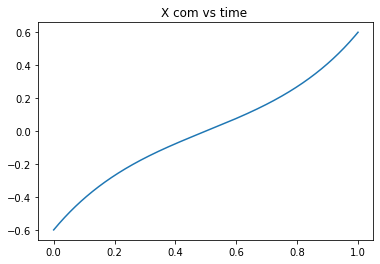

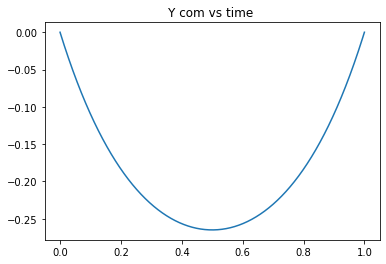

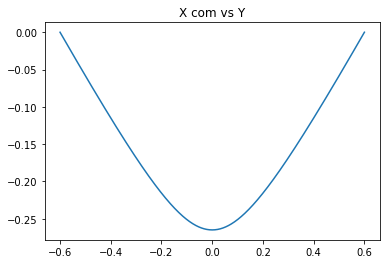

In [18]:
# Graphs for the COM trajectory , here z is constant
plot_data(x_data ,y_data  , t_data, "X com vs time ","Y com vs time ","X com vs Y com")

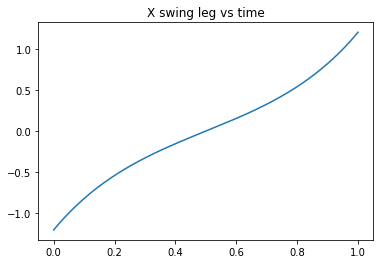

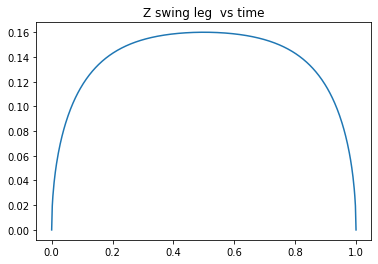

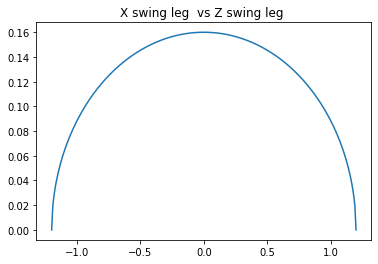

In [19]:
# Graphs for the Swing leg trajectory , here z is constant
plot_data(x_s ,  z_s  , t_data, "X swing leg vs time","Z swing leg  vs time","X swing leg  vs Z swing leg ")

In [10]:
# simulating combined motion
def plotc(x_data , y_data , z_data , x_s , y_s , z_s , fs):
        import matplotlib.pyplot as plt
        from celluloid import Camera
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        camera = Camera(fig)
        axis = plt.axes(projection='3d')
        axis = Axes3D(fig)
        # axis.set_xlim3d( 0.05 , )
        # axis.set_ylim3d(-3.3, 3.3)
        # axis.set_zlim3d(-3.3, 3.3)
 
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_zlabel('$Z$')
        axis.set_title("3D simulation")
  
        line1, = axis.plot([], [],[], lw = 3,color='orange')  

        xs2 ,ys2 ,zs2 = fs[0] ,fs[1] ,fs[2]
    

        for i in range(len(x_data)):

            x = x_data[i] 
            y = y_data[i] 
            z = z_data[i] 
            xs = x_s[i]   
            ys = y_s[i]  
            zs = z_s[i]   
            if ( i % 40 == 0):
                print(" ",i)

            p = axis.plot3D( [x] , [y] , [z],'g.')
            q = axis.plot3D( [xs] , [ys] , [zs] , 'r.')
            r = axis.plot3D( [xs2] , [ys2] , [zs2] , 'b.')
            line1 = axis.plot([xs,x], [ys,y],[zs,z], lw = 1, color='orange') 
            line1 = axis.plot([xs2,x], [ys2,y],[zs2,z], lw = 1, color='black') 
            

           
            camera.snap()

        animation = camera.animate(interval = 20, repeat = False)
                          
        animation.save("traj" + '.gif' , writer='pillow')


  0
  40
  80
  120
  160
  200
  240
  280
  320
  360
  400
  440
  480


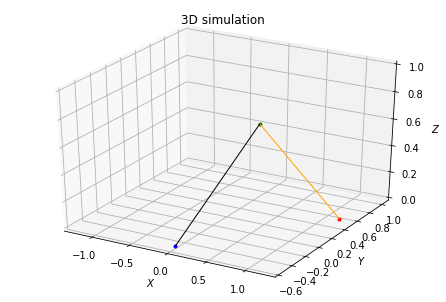

In [11]:
plotc( x_data ,y_data ,z_data  , x_s , y_s , z_s ,fs )

In [12]:
def plot_2d_top( x_data , y_data ,x_s ,y_s ,fs):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Y$')
        axis.set_title("Top view")
        line1, = axis.plot([], [], lw = 3  ,color='orange',label='Swing foot')  
        line2, = axis.plot([], [], lw = 3 ,color='black',label='Fixed foot')  
        
        xs2 ,ys2 ,zs2 = fs[0] ,fs[1] ,fs[2]

        def animate(i): 
            x = x_data[i] 
            y = y_data[i] 
            # z = z_data[i] 
            xs = x_s[i]   
            ys = y_s[i]  
            # zs = z_s[i]   
            if ( i % 40 == 0):
                print(" ",i)
            
            p = axis.plot( [x] , [y] ,'g.',label='COM traj')
            q = axis.plot( [xs] , [ys]  , 'r.',label='Swing foot tip traj')
            r = axis.plot( [xs2] , [ys2]  , 'b.',label='Fix foot tip')
            line1.set_data([xs,x], [ys,y]) 
            line2.set_data([xs2,x], [ys2,y]) 
            
            return line1, line2  
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(x_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_top_view.gif", writer=writergif)

  0
  0
  0
  40
  80
  120
  160
  200
  240
  280
  320
  360
  400
  440
  480


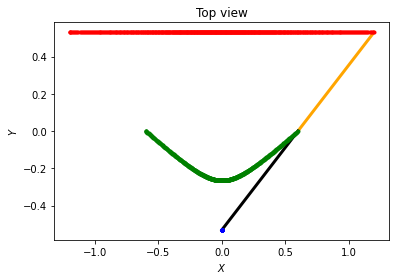

In [13]:
plot_2d_top( x_data , y_data ,x_s ,y_s , fs)

In [14]:
def plot_2d_side( x_data , z_data ,x_s ,z_s ,fs):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$X$')
        axis.set_ylabel('$Z$')
        axis.set_title("Side view")
        line1, = axis.plot([], [], lw = 3 ,color='orange')  
        line2, = axis.plot([], [], lw = 3 , color='black')  
        
        xs2 ,ys2 ,zs2 = fs[0] ,fs[1] ,fs[2]

        def animate(i): 
            x = x_data[i] 
            # y = y_data[i] 
            z = z_data[i] 
            xs = x_s[i]   
            # ys = y_s[i]  
            zs = z_s[i]   
            if ( i % 40 == 0):
                print(" ",i)
            
            p = axis.plot( [x] , [z] ,'g.')
            q = axis.plot( [xs] , [zs]  , 'r.')
            r = axis.plot( [xs2] , [zs2]  , 'b.')
            line1.set_data([xs,x], [zs,z]) 
            line2.set_data([xs2,x], [zs2,z]) 
            
            return p 
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(x_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_side_view.gif", writer=writergif)

  0
  0
  0
  40
  80
  120
  160
  200
  240
  280
  320
  360
  400
  440
  480


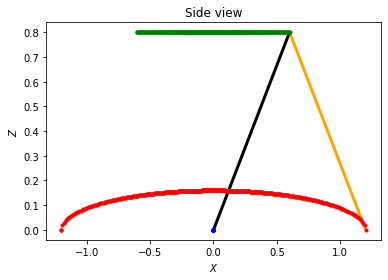

In [15]:
plot_2d_side( x_data , z_data ,x_s ,z_s ,fs)

In [16]:
def plot_2d_front( y_data , z_data ,y_s ,z_s ,fs):

        import matplotlib.pyplot as plt
        from matplotlib.animation import FuncAnimation 
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.animation import PillowWriter
        fig = plt.figure()
        # axis = plt.axes(projection='3d')
        # axis = Axes3D(fig)
        axis = plt.axes()
        axis.set_xlabel('$Y$')
        axis.set_ylabel('$Z$')
        axis.set_title("Front view")
        line1, = axis.plot([], [], lw = 3 ,color='orange')  
        line2, = axis.plot([], [], lw = 3 , color='black')  
        
        xs2 ,ys2 ,zs2 = fs[0] ,fs[1] ,fs[2]

        def animate(i): 
            # x = x_data[i] 
            y = y_data[i] 
            z = z_data[i] 
            # xs = x_s[i]   
            ys = y_s[i]  
            zs = z_s[i]   
            if ( i % 40 == 0):
                print(" ",i)
            
            p = axis.plot( [y] , [z] ,'g.')
            q = axis.plot( [ys] , [zs]  , 'r.')
            r = axis.plot( [ys2] , [zs2]  , 'b.')
            line1.set_data([ys,y], [zs,z]) 
            line2.set_data([ys2,y], [zs2,z]) 
            
            return p 
   
        anim = FuncAnimation(fig, animate, init_func = None, 
                     frames = len(x_data), interval = 200, blit = True) 
        writergif = PillowWriter(fps=30) 
        anim.save("2d_front_view.gif", writer=writergif)

  0
  0
  0
  40
  80
  120
  160
  200
  240
  280
  320
  360
  400
  440
  480


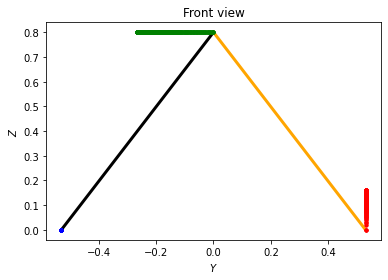

In [17]:
 plot_2d_front( y_data , z_data ,y_s ,z_s ,fs)